# Linear Regression Model

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import math

In [24]:
ts = '0269'
sim_type = 'logit'

path = os.path.join(os.getcwd(), "simulation_data")
folder_path = os.path.join(path, "%s_%s_data" % (ts, sim_type))
listing = ts + "_" + sim_type + "_rawdata.csv"
path = os.path.join(folder_path, listing)
print(path)

df = pd.read_csv(path,header=None).T
df

/Users/saniyavaidya/Documents/4580_final_project/simulation_data/0269_logit_data/0269_logit_rawdata.csv


,0,1,2,3,4,5
0,-0.108239,9.048942,0.578846,0.775824,0.885385,0.953846
1,0.209757,8.064059,0.599375,0.785275,0.878462,0.900000
2,-1.045435,7.017646,0.585048,0.775165,0.836154,0.835897


In [25]:
df = df.rename(columns={0: "alpha", 1: "gamma", 2: "% Men in J", 3: "% Men in M", 4: "% Men in S" , 5: "% Men in E"})
df.head()

,alpha,gamma,% Men in J,% Men in M,% Men in S,% Men in E
0,-0.108239,9.048942,0.578846,0.775824,0.885385,0.953846
1,0.209757,8.064059,0.599375,0.785275,0.878462,0.900000
2,-1.045435,7.017646,0.585048,0.775165,0.836154,0.835897


In [26]:
df['bias'] = (math.e**df['alpha']) / (1+math.e**df['alpha'])
df.head()

,alpha,gamma,% Men in J,% Men in M,% Men in S,% Men in E,bias
0,-0.108239,9.048942,0.578846,0.775824,0.885385,0.953846,0.472967
1,0.209757,8.064059,0.599375,0.785275,0.878462,0.900000,0.552248
2,-1.045435,7.017646,0.585048,0.775165,0.836154,0.835897,0.260103


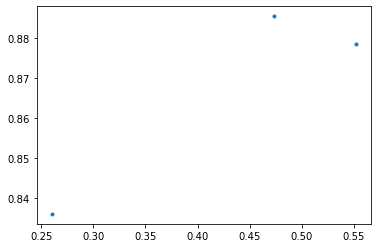

In [27]:
#plt.plot(df['bias'],df['% Men in J'],'.')
#plt.plot(df['alpha'],df['% Men in M'],'.')
#plt.plot(df['bias'],df['% Men in M'],'.')
plt.plot(df['bias'],df['% Men in S'],'.')
#plt.plot(df['bias'],df['% Men in E'],'.')

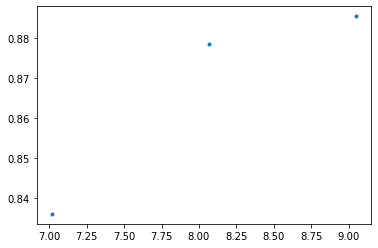

In [28]:
#plt.plot(df['gamma'],df['% Men in J'],".")
#plt.plot(df['gamma'],df['% Men in M'],".")
plt.plot(df['gamma'],df['% Men in S'],".")
#plt.plot(df['gamma'],df['% Men in E'],".")

In [29]:
df[['alpha','gamma']].head()

,alpha,gamma
0,-0.108239,9.048942
1,0.209757,8.064059
2,-1.045435,7.017646


In [30]:
model = sm.OLS(df['% Men in S'], sm.add_constant(df[['bias','gamma']])).fit()
model.summary()

/Users/saniyavaidya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/saniyavaidya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/saniyavaidya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/saniyavaidya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             % Men in S   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                nan
Time:                        00:19:19   Log-Likelihood:                 100.85
No. Observations:                   3   AIC:                            -195.7
Df Residuals:                       0   BIC:                            -198.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7102        inf          0        nan         nan         nan
bias           0.0929        inf          0        nan         nan         nan
gamma          0.0145        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.144
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.354
Skew:                           0.382   Prob(JB):                        0.838
Kurtosis:                       1.500   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
alpha_model = sm.OLS(df['% Men in S'], sm.add_constant(df['bias'])).fit()
alpha_model.summary()

/Users/saniyavaidya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             % Men in S   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     5.729
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.252
Time:                        00:19:20   Log-Likelihood:                 10.086
No. Observations:                   3   AIC:                            -16.17
Df Residuals:                       1   BIC:                            -17.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7969      0.030     26.285      0.024       0.412       1.182
bias           0.1628      0.068      2.394      0.252      -0.701       1.027
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.993
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.409
Skew:                           0.506   Prob(JB):                        0.815
Kurtosis:                       1.500   Cond. No.                         9.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

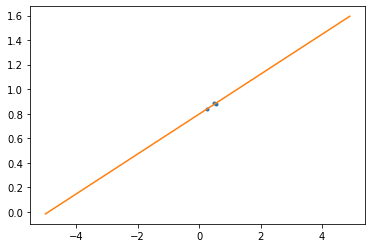

In [32]:
#plt.plot(df['alpha'],df['% Men in E'],".")
X = np.arange(-5,5,0.1)
Y = alpha_model.params[0] + alpha_model.params[1]*X

plt.plot(df['bias'],df['% Men in S'],".")
plt.plot(X,Y)

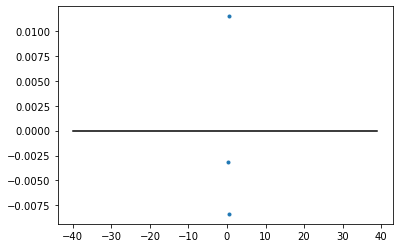

In [33]:
plt.plot(df['bias'],alpha_model.resid,".")
plt.plot(np.arange(-40,40,1),np.zeros(80),color='black')

In [217]:
model = sm.OLS(df['% Men in M'], sm.add_constant(df['gamma'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             % Men in M   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 10 Dec 2023   Prob (F-statistic):                nan
Time:                        20:46:59   Log-Likelihood:                 106.23
No. Observations:                  40   AIC:                            -210.5
Df Residuals:                      39   BIC:                            -208.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gamma          0.5628      0.003    206.786      0.000       0.557       0.568
==============================================================================
Omnibus:                        5.944   Durbin-Watson:                   2.411
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                4.659
Skew:                           0.785   Prob(JB):                       0.0973
Kurtosis:                       3.573   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""